<a href="https://colab.research.google.com/github/jery5237hent/Deep-Learning/blob/main/HW1_1_0852629.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--config', default = 0, help='Enter the path of the neural network setting')
parser.add_argument('--weight', default = 0, help = 'Enter the path of the initial weight')
parser.add_argument('--imagefile', default = 0, help = 'Enter the path of test images')

args = parser.parse_args()

In [ ]:
# !unzip test_jpeg.zip

In [ ]:
from PIL import Image
import numpy as np
# import cupy as np
import matplotlib.pyplot as plt
import json

$\textbf{Deritative of sigmoid:}$
$$
\begin{array}{l}
s(x) = \frac{1}{1+e^{-x}} \\
\frac{d s(x)}{d x} =\left(\frac{1}{1+e^{-x}}\right)^{2} \frac{d}{d x}\left(1+e^{-x}\right) \\
=\left(\frac{1}{1+e^{-x}}\right)^{2} e^{-x}(-1) \\
=\left(\frac{1}{1+e^{-x}}\right)\left(\frac{1}{1+e^{-x}}\right)\left(-e^{-x}\right) \\
=\left(\frac{1}{1+e^{-x}}\right)\left(\frac{-e^{-x}}{1+e^{-x}}\right) \\
=s(x)(1-s(x))
\end{array}
$$

$\textbf{Deritative of ReLU:}$
$$
\begin{array}{l}
f(x)=max(0,x) \\
f'(x) = \begin{cases}
0& x < 0\\
1& x\ge 0
\end{cases}
\end{array}
$$

**Definitions:**

$z_{k}^{l}$ is the weighted sum of activations from the previous layer. That is,
$$
z_{k}^{l}=b_{k}^{l}+\sum_{j} W_{k j}^{l} a_{j}^{l-1}
$$
$a_{k}^{l}$ refers to neuron activations, $a_{k}^{l}=f\left(z_{k}^{l}\right),$ where $f(.)$ is the activation function. In this note, we assume that the last layer uses a softmax
$$
a_{k}^{L}=\operatorname{softmax}\left(z_{k}^{L}\right)=\frac{e^{z_{k}^{L}}}{\sum_{c} e^{z_{c}^{L}}}
$$
and the hidden layers use ReLU
$$
a_{k}^{l}=\operatorname{relu}\left(z_{k}^{l}\right)=\max \left(0, z_{k}^{l}\right)
$$

$t_{k}$ is the gold probability for the $k^{t h}$ neuron in the output layer. It is one-hot encoded
$E$ is the output error measured on one input example. We use Cross Entropy: 
$$
E=-\sum_{d} t_{d} \log a_{k}^{L}=-\sum_{d} t_{d}\left(z_{d}^{L}-\log \sum_{c} e^{z_{c}^{L}}\right)
$$

**Gradient descent**

$$
\Delta W_{k j}^{l}=-\epsilon \frac{\partial E}{\partial a_{k}^{l}}=-\epsilon \frac{\partial E}{\partial a_{k}^{l}} \frac{\partial a_{k}^{l}}{\partial z_{k}^{l}} \frac{\partial z_{k}^{l}}{\partial W_{k j}^{l}}
$$

**Backpropagation**

1. Derivatives for last layer

$$
\frac{\partial E}{\partial W_{k j}^{L}}=\frac{\partial E}{\partial z_{k}^{L}} \frac{\partial z_{k}^{L}}{\partial W_{k j}^{L}}
$$

$$
\begin{aligned}
\frac{\partial E}{\partial z_{k}^{L}} &=-\sum_{d} t_{d}\left(\mathbb{1}_{d=k}-\frac{1}{\sum_{c} e^{z_{c}}} e^{z_{k}^{L}}\right) \\
&=-\sum_{d} t_{d}\left(\mathbb{1}_{d=k}-a_{k}^{L}\right) \\
&=\sum_{d} t_{d} a_{k}^{L}-\sum_{d} t_{d} \mathbb{1}_{d=k} \\
&=a_{k}^{L} \sum_{d} t_{d}-t_{k} \\
&=a_{k}^{L}-t_{k}
\end{aligned}
$$
where the $\mathbb{1}_{d=k}$ is an identify function:
$$
\mathbb{1}_{d=k}=\left\{\begin{array}{ll}
1 & \text { if } d=k \\
0 & \text { otherwise }
\end{array}\right.
$$
Then we can define $\delta_{k}^{L}$ as
$$
\delta_{k}^{L}=\frac{\partial E}{\partial z_{k}^{L}}=a_{k}^{L}-t_{k}
$$
and
$$
\frac{\partial z_{k}^{L}}{\partial W_{k j}^{L}}=a_{j}^{L-1}
$$
Therefore,
$$
\frac{\partial E}{\partial W_{k j}^{L}}=\frac{\partial E}{\partial z_{k}^{L}} \frac{\partial z_{k}^{L}}{\partial W_{k j}^{L}}=\delta_{k}^{L} a_{j}^{L-1}
$$

**Use the chain rule to update for the previous layer**

$$
\begin{array}{c}
\frac{\partial E}{\partial W_{j i}^{l-1}}=\frac{\partial E}{\partial a_{j}^{l-1}} \frac{\partial a_{j}^{l-1}}{\partial z_{j}^{l-1}} \frac{\partial z_{j}^{l-1}}{\partial W_{j i}^{l-1}} \\
\frac{\partial E}{\partial a_{j}^{l-1}}=\sum_{k} \frac{\partial E}{\partial z_{k}^{l}} \frac{\partial z_{k}^{l}}{\partial a_{j}^{l-1}} \\
=\sum_{k} \delta_{k}^{l} W_{k j}^{l} \\
\frac{\partial a_{j}^{l-1}}{\partial z_{j}^{l-1}}=f^{\prime}\left(z_{j}^{l-1}\right) \\
\frac{\partial z_{j}^{l-1}}{\partial W_{j i}^{l-1}}=a_{i}^{l-2}
\end{array}
$$

$$
\frac{\partial E}{\partial W_{j i}^{l-1}}=a_{i}^{l-2} f^{\prime}\left(z_{j}^{l-1}\right) \sum_{k} \delta_{k}^{l} W_{k j}^{l}
$$

Define:

$\delta_{j}^{l-1}=\frac{\partial E}{\partial a_{j}^{l-1}} \frac{\partial a_{j}^{l-1}}{\partial z_{j}^{l-1}}=f^{\prime}\left(z_{j}^{l-1}\right) \sum_{k} \delta_{k}^{l} W_{k j}^{l}$

Therefore,
$$
\frac{\partial E}{\partial W_{j i}^{l-1}}=\delta_{j}^{l-1} a_{i}^{l-2}
$$


In [ ]:
class NN():
    def __init__(self, batchsize = None, mode = None):
        self.layer, self.epoch, self.lr, self.batchsize = self.load_nn()
        
        if batchsize and (batchsize > 0):
            self.batchsize = batchsize
        
        # number of iteration
        self.n_batch = np.ceil(X_train.shape[0]/self.batchsize).astype(int)
        # number of input layer
        self.n_layer = len(self.layer)
        # choose how to initialize the weight
        self.parameters = self.initialize(mode)
        # store the weight in order to do back propagation
        self.memory = {}
        
    def load_nn(self):
        # if there is no config.json, load the default setting
        if not args.config:
            nn = {"nn": { "layer1":{
                "input_dim": 1024, "output_dim": 2048,
                "act": "relu" },
                "layer2":{ "input_dim": 2048,
                "output_dim": 512,
                "act": "relu" },
                "output":{ "input_dim": 512,
                "output_dim": 6, "act": "softmax"
                }},
                "epoch": 50, 
                "lr": 0.001,
                "batch_size": 128, 
                "criterion": "cross_entropy"}
        # or we load the json file to implement the setting
        else:
            with open(args.config) as f:
                nn = json.load(f)
            
        return nn['nn'], nn['epoch'], nn['lr'], nn['batch_size']
        
    def initialize(self, mode = None):
        np.random.seed(123)
        parameters = {}
        # zero initialization
        if mode == 0:
            for idx, layer in enumerate(self.layer.values()):
                idx += 1 
                parameters['W'+str(idx)] = np.zeros((layer['output_dim'], layer['input_dim']))

        # random weight
        elif (not args.weight) and (not mode):
            for idx, layer in enumerate(self.layer.values()):
                idx += 1 
                parameters['W'+str(idx)] = np.random.randn(layer['output_dim'], layer['input_dim']) * np.sqrt(1. / layer['input_dim'])

        # read the weight.npz
        else: 
            with np.load(args.weight) as data:
                for idx, (file, layer) in enumerate(zip(data.files, self.layer.values())):
                    idx += 1 
                    parameters['W'+str(idx)] = data[files].reshape(layer['output_dim'], layer['input_dim'])

        return parameters
    # Activation functions: set derivative == True if we need to do backpropagation
    def relu(self, x, derivative = False):
        if derivative:
            dx = np.ones(x.shape)
            dx[x < 0] = 0
            return dx
        return np.maximum(0, x)
    
    def softmax(self, x, derivative = False):
        exps = np.exp(x - x.max()) #avoid overflow
        return exps / np.sum(exps, axis=0)
    
    def sigmoid(self, x, derivative = False):
        if derivative:
            return np.multiply((1/(1+np.exp(-x))),(np.exp(-x)/(1+np.exp(-x))))
        return (1/(1+np.exp(-x)))
    
    # implement: z = wx + b, a = f(z)
    def Feedforward(self, x):
        self.memory['A0'] = x.T
        
        for idx, layer in enumerate(self.layer.values()):
            idx += 1
            self.memory['Z'+str(idx)] = np.matmul(self.parameters['W'+str(idx)], self.memory['A'+str(idx-1)])
            self.memory['A'+str(idx)] = getattr(self,layer['act'])(self.memory['Z'+str(idx)])

        return self.memory['A' + str(idx)]
    
    def cross_entropy_loss(self, output, target):
        if output.ndim == 1:
            output, target = output.reshape(1, output.size), t.reshape(1, target.size)
        batch_size = target.shape[0]
        
        return (-1./batch_size) * np.sum(target.T * np.log(output))    
    
    # use the equation above to calculate the derivative
    def Backpropagate(self, output, y):
        gradients = {}
        batchsize = y.shape[0]
        # last layer : calculate the loss
        dz = self.memory['A' + str(self.n_layer)] - y.T
        gradients['dW' + str(self.n_layer)] = (1./batchsize) * np.matmul(dz, self.memory['A' + str(self.n_layer-1)].T)
        
        for i in range(self.n_layer-1, 0, -1):
            dz = self.relu(self.memory['Z'+str(i)], derivative = True) * np.matmul(self.parameters['W' + str(i+1)].T, dz)
            gradients['dW' + str(i)] = (1./batchsize) * np.matmul(dz, self.memory['A' + str(i-1)].T)
        
        return gradients
    
    # use gradient descent to update the weight
    def update_weight(self, gradient):
        for idx in range(self.n_layer):
            idx += 1
            self.parameters['W' + str(idx)] -= self.lr * gradient['dW' + str(idx)]

    def acc(self, y_pred, y):
        return (np.argmax(y_pred, axis = 0) == np.argmax(y, axis = 1)).mean()
        
    def val(self, x, y, stage):
        output = self.Feedforward(x)
        loss = self.cross_entropy_loss(output, y)
        acc = self.acc(output, y)
        # print(f"{stage} loss = {loss:.3f}, {stage} acc = {acc:.3%} \n")
        return loss, acc
    
    def plot_result(self, training, testing):
        training, testing = np.array(training), np.array(testing)
        # training, testing = np.asnumpy(training), np.asnumpy(testing)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
        
        ax1 = plt.subplot(1, 2, 1)
        ax1.plot(1 + np.arange(self.epoch), training[:, 0], label = 'training')
        ax1.plot(1 + np.arange(self.epoch), testing[:, 0], label = 'testing')
        # ax1.plot(1 + np.asnumpy(np.arange(self.epoch)), training[:, 0], label = 'training')
        # ax1.plot(1 + np.asnumpy(np.arange(self.epoch)), testing[:, 0], label = 'testing')
        ax1.legend()
        plt.title("Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.ylim(0, 2)
        
        ax2 = plt.subplot(1, 2, 2)
        ax2.plot(1 + np.arange(self.epoch), training[:, 1], label = 'training')
        ax2.plot(1 + np.arange(self.epoch), testing[:, 1], label = 'testing')

        # ax2.plot(1 + np.asnumpy(np.arange(self.epoch)), training[:, 1], label = 'training')
        # ax2.plot(1 + np.asnumpy(np.arange(self.epoch)), testing[:, 1], label = 'testing')

        ax2.legend()
        plt.title("Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.ylim(0, 1)

        plt.show()
        
    def predict(self, x):
      # the index of largest probabilty is our prediction based on the given image
        output = np.argmax(self.Feedforward(x), axis = 0)
        np.savetxt('output.txt', output, fmt='%d', newline='')
    
    def train(self, x, y, x_val, y_val):
        training = []
        testing = []
        
        for i in range(self.epoch):
            # print(f"Epoch {i + 1}:\n")
            for j in range(self.n_batch):
            # for j in range(self.n_batch.item()):
            # feed batch data
                x_batch, y_batch = x[j*self.batchsize:(j+1)*self.batchsize, :], y[j*self.batchsize:(j+1)*self.batchsize, :]

                output = self.Feedforward(x_batch)
                loss = self.cross_entropy_loss(output, y_batch)
                gradient = self.Backpropagate(output, y_batch)
                self.update_weight(gradient)
                
            loss, acc = self.val(x, y, "training")
            training.append([loss.item(), acc.item()])
            
            loss, acc = self.val(x_val, y_val, "testing")
            testing.append([loss.item(), acc.item()])
        if not args.config:
          self.plot_result(training, testing)

**Data Preprocessing**

We load the given dataset, divide the pixel value by 255 and do one-hot encoding on label. If the given image isn't (32, 32), we resize it.

In [ ]:
def load_data(filename):
    img = np.load(filename)
    X, y = img['image']/255, img['label']
    y = np.eye(np.amax(y).item()+1)[y]
    
    X, y = X.reshape(X.shape[0], -1), y.reshape(y.shape[0], -1)
    return X, y

In [ ]:
X_train, y_train = load_data('train.npz')
X_val, y_val = load_data('test.npz')

if not args.imagefile:
    X_test, y_test = X_val, y_val

else:
# if 1:
    with open(args.imagefile, 'rb') as f:
        img_list = [line.strip() for line in f]
        img = map(lambda x: Image.open(x).convert("L").resize((32, 32)), img_list)
        X_test = list(map(np.array, img))
        X_test = np.array(X_test)/255
        X_test = X_test.reshape(X_test.shape[0], -1)

We use the np.random.randn() function to get our initial weights. And the function draws from the standard normal distribution. To adjust the variance to 1/n, we just divide by $\sqrt{n}$. 

Our model is without bias for each neuron.

initial setting:

                "epoch": 50, 
                "lr": 0.001,
                "batch_size": 128

Steps:

1. Read the training data and validation data
2. Data preprocessing
3. Determine the neuron network architecture and initialize the weight
4. Use the activation function and input to calculate output in the layer
5. Calculate the cross entropy loss
6. Use backpropogation to calculate the deritatives and update the weight

Keep doing 4-6 until the iteration ends.


(a) Plot the learning curves of $J(\mathbf{w})$ and the accuracy of classification versus the number of iterations until convergence for training data as well as test data. (10\%)

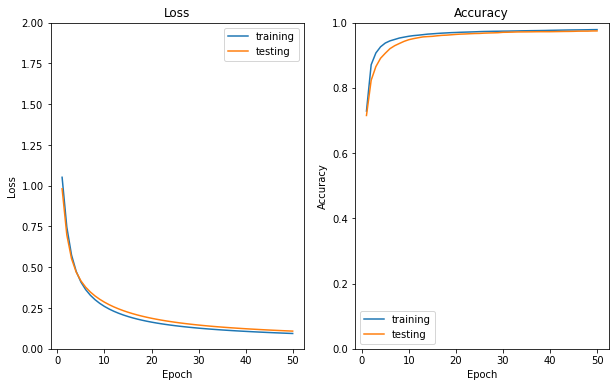

In [ ]:
if not args.config:
    DNN = NN() #batch size = 128
    DNN.train(X_train, y_train, X_val, y_val)
#     DNN.predict(X_test)

(b) Repeat $1$(a) by using different batch sizes. And do some discussions. $(10 \%)$

We compare the results by setting the batch size as 64, 128 and 1024.

Since choosing large batch size tend to converge to sharp minimizers of the training function, it would weaken the generalization ability.

As we can see, when the batch size becomes larger, the training and test accuracy becomes lower in the first 10 epochs.

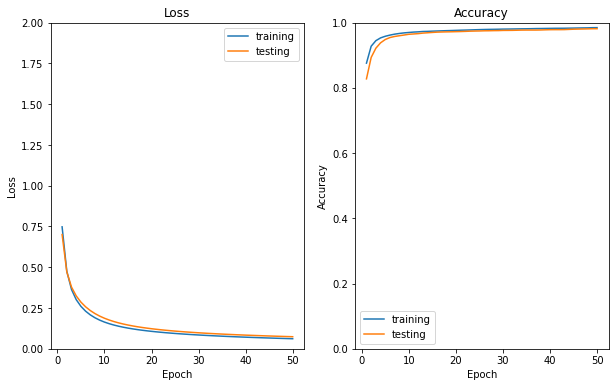

In [ ]:
if not args.config:
    DNN = NN(batchsize = 64)
    DNN.train(X_train, y_train, X_val, y_val)

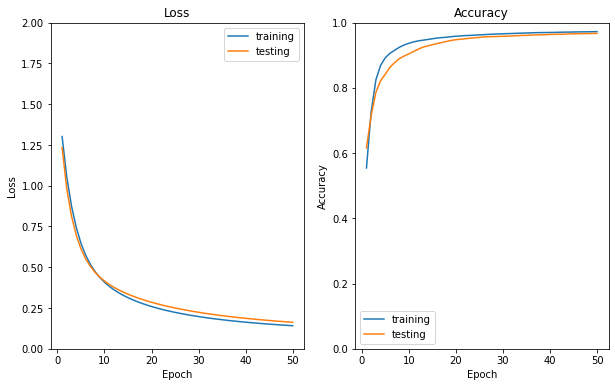

In [ ]:
if not args.config:
    DNN = NN(batchsize = 256)
    DNN.train(X_train, y_train, X_val, y_val)

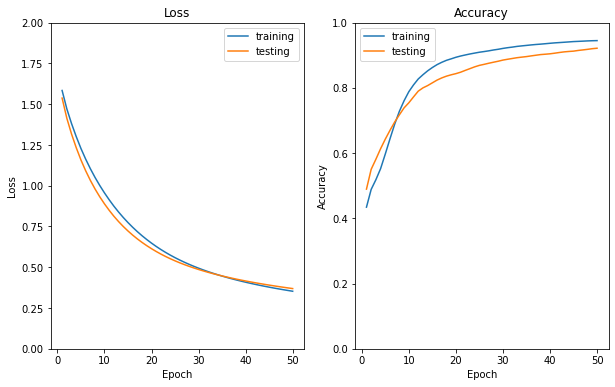

In [ ]:
if not args.config:
    DNN = NN(batchsize = 1024)
    DNN.train(X_train, y_train, X_val, y_val)

(c) Repeat $1$(a) by performing zero initialization for the model weights. And do some discussions. (10\%)

Since zero initialization would cause the derivatives of weights in the same layer remain the same, the neurons would learn the same features. Therefore, for neurons to learn different features, we should randomly initialize the weights to break symmetry.

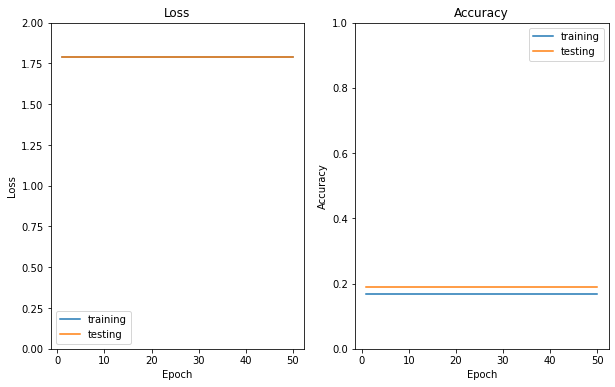

In [ ]:
if not args.config:
    DNN = NN(mode = 0)
    DNN.train(X_train, y_train, X_val, y_val)

2. Implement a flexible program that can parse the arguments to generate a specific FNN model but without bias for each neuron, and also need to run backpropagation algorithm and use mini-batch SGD to optimize the parameters:

In [ ]:
# !python hw1_1_0852629.py --config spec/config.json --imagefile spec/img.txt

In [ ]:
if args.config:
    DNN = NN()
    DNN.train(X_train, y_train, X_val, y_val)
    DNN.predict(X_test)